In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import plotly.offline as pyo
import plotly.graph_objs as go

In [3]:
data=pd.read_csv('Social_Network_Ads')

In [4]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
data_not_purchase=data[data['Purchased']==0]

In [6]:
data_purchase=data[data['Purchased']==1]

In [7]:
trace1=go.Scatter(x=data_purchase['Age'],y=data_purchase['EstimatedSalary'],mode='markers',marker={'color':'#00a65a'},name='Purchased')

In [8]:
trace=go.Scatter(x=data_not_purchase['Age'],y=data_not_purchase['EstimatedSalary'],mode='markers',name='Not Purchased')

In [9]:
data1=[trace,trace1]

In [10]:
layout=go.Layout(title='Purchased based on age & salary',xaxis={'title':'Age'},yaxis={'title':'Salary'})

In [11]:
fig=go.Figure(data=data1,layout=layout)

In [12]:
pyo.plot(fig,filename='myfile.html')

'myfile.html'

In [13]:
X=data.iloc[:,2:4].values

In [14]:
X.shape

(400, 2)

In [15]:
y=data.iloc[:,-1].values

In [16]:
y.shape

(400,)

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

In [18]:
X_train.shape

(320, 2)

In [19]:
X_test.shape

(80, 2)

In [20]:
y_train.shape

(320,)

In [21]:
np.sqrt(X_train.shape[0])

17.88854381999832

In [22]:
k=17

In [23]:
scaler=StandardScaler()

In [24]:
X_train=scaler.fit_transform(X_train)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



In [25]:
X_test=scaler.transform(X_test)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



In [26]:
knn=KNeighborsClassifier(n_neighbors=k)

In [27]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=17, p=2,
           weights='uniform')

In [28]:
y_pred=knn.predict(X_test)

In [29]:
y_pred.shape

(80,)

In [30]:
accuracy_score(y_test,y_pred)

0.9

In [31]:
accuracy=[]
for i in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    accuracy.append(accuracy_score(y_test,(knn.predict(X_test))))

In [32]:
accuracy

[0.8875,
 0.875,
 0.925,
 0.8625,
 0.9,
 0.8875,
 0.9125,
 0.9,
 0.9125,
 0.9,
 0.9125,
 0.9,
 0.9,
 0.9,
 0.9125,
 0.9,
 0.9,
 0.9,
 0.9125]

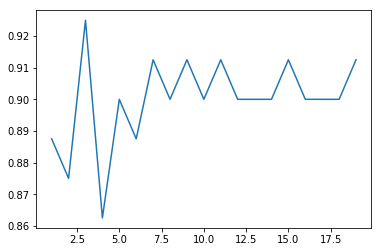

In [33]:
plt.plot(range(1,20),accuracy)

In [34]:
knn=KNeighborsClassifier(n_neighbors=11)

In [35]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=11, p=2,
           weights='uniform')

In [36]:
y_prediction=knn.predict(X_test)

In [37]:
accuracy_score(y_test,y_prediction)

0.9125

In [38]:
def predict_output():
    age=int(input("Enter your age: "))
    salary=int(input("Enter your salary: "))
    x=np.array([[age],[salary]]).reshape(1,2)
    x=scaler.transform(x)
    
    if (knn.predict(x)[0]==0):
        print("THE ANSWER:  Will not purchase")
    if (knn.predict(x)[0]==1):
        print("THE ANSWER:  Will purchase")

In [39]:
predict_output()

Enter your age: 26
Enter your salary: 690000
THE ANSWER:  Will purchase


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int32 was converted to float64 by StandardScaler.



In [40]:
predict_output()

Enter your age: 85
Enter your salary: 100000
THE ANSWER:  Will purchase


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int32 was converted to float64 by StandardScaler.

